In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as pyplot

# chargement des données officielles issus de l'open data poru servir de référence.
sourceDataFrame = pd.read_csv("/content/drive/MyDrive/mon drive/cours/qualite des donnees/app_python/data/climatcorrect.csv")
pd.set_option("display.max.columns", None)

del sourceDataFrame['jour']


Moyenne des températures par mois sur toute l'année 2018.


janvier      -8.967742
février      -4.928571
mars          1.193548
avril         8.000000
mai          12.903226
juin         17.033333
juillet      18.322581
aout         17.838710
septembre    10.500000
octobre       3.870968
novembre     -0.333333
décembre     -7.000000
dtype: float64

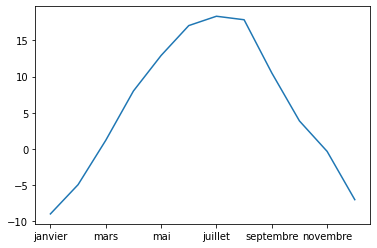

In [222]:
# Moyenne des températures par mois
print("Moyenne des températures par mois sur toute l'année 2018.")
sourceDataFrame.mean().plot(kind='line', use_index=True)
sourceDataFrame.mean()

Température maximale par mois sur toute l'année 2018.


janvier      -3.0
février       5.0
mars          7.0
avril        16.0
mai          18.0
juin         22.0
juillet      26.0
aout         26.0
septembre    16.0
octobre       7.0
novembre      5.0
décembre     -3.0
dtype: float64

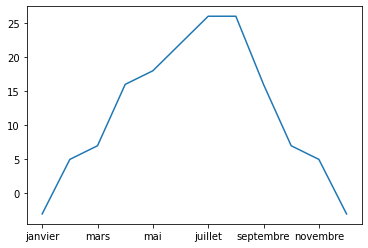

In [223]:
# Température maximale par mois sur toute l'année 2018.
print("Température maximale par mois sur toute l'année 2018.")
sourceDataFrame.max().plot(kind='line', use_index=True)
sourceDataFrame.max()

Température minimale par mois sur toute l'année 2018.


janvier     -23.0
février     -12.0
mars         -8.0
avril         2.0
mai           5.0
juin         11.0
juillet      13.0
aout         14.0
septembre     6.0
octobre       1.0
novembre     -8.0
décembre    -11.0
dtype: float64

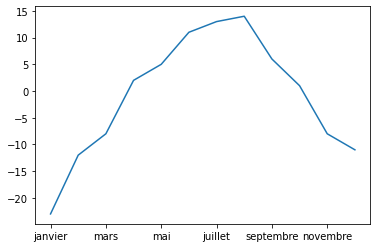

In [224]:
# Température minimale par mois sur toute l'année 2018.
print("Température minimale par mois sur toute l'année 2018.")
sourceDataFrame.min().plot(kind='line', use_index=True)
sourceDataFrame.min()

janvier      4.490611
février      4.561746
mars         3.506369
avril        3.151354
mai          4.036127
juin         3.011281
juillet      3.571994
aout         2.696872
septembre    2.330458
octobre      1.802627
novembre     3.717000
décembre     2.065591
dtype: float64

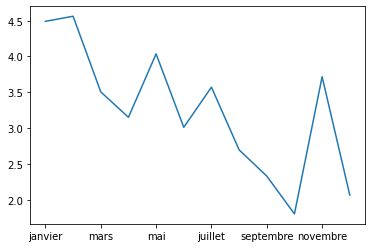

In [225]:
# écart type des températures par mois sur toute l'année 2018.
sourceDataFrame.std().plot(kind='line', use_index=True)
sourceDataFrame.std()

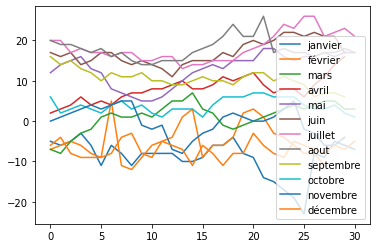

In [226]:
# toutes les courbes sur un même tableau
sourceDataFrame.plot(kind='line')

In [227]:
annualValues = []

for name, values in sourceDataFrame.iteritems():
    for dayValue in values:
      if(np.logical_not(np.isnan(dayValue))):
            annualValues.append(dayValue)

d = {'degreesPerDay': annualValues}
dataframePerDay = pd.DataFrame(data=d)
dataframePerDay

,degreesPerDay
0,-5.0
1,-6.0
2,-5.0
3,-3.0
4,-6.0
...,...
360,-7.0
361,-8.0
362,-6.0
363,-7.0


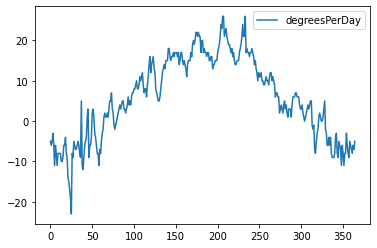

In [228]:
dataframePerDay.plot(kind='line')

In [229]:
# Présenter la valeur lue en parcourant la courbe à l'aide d'un curseur


In [230]:
# Chargement des fausses données.
# L'objectif va donc être d'essayer d'obtenir à peu près la même structure de dataframe que pour notre source officielle.abs
# Nous pourrons donc par la suite comparer ces données (en faisant un dernier dataframe avec les données éronnés et les données issu de la source officielle).
wrongDataFrame = pd.read_csv("/content/drive/MyDrive/mon drive/cours/qualite des donnees/app_python/data/climaterreur.csv")
del wrongDataFrame['jour']
wrongDataFrame

,janvier,février,mars,avril,mai,juin,juillet,aout,septembre,octobre,novembre,décembre
0,-5,-7.0,-7,2.0,12,17,20,20,16.0,6,0.0,-6
1,-6,-6.0,-8,3.0,14,16,20,19,14.0,2,1.0,-4
2,-5,-5.0,-5,4.0,15,17,17,19,15.0,3,2.0,-8
3,-3,-6.0,-3,6.0,16,14,18,18,13.0,4,3.0,-9
4,-6,-8.0,-2,4.0,13,15,17,17,12.0,3,4.0,-9
5,-11,-9.0,1,5.0,12,17,17,18,10.0,2,3.0,-9
6,-6,5.0,2,4.0,8,17,16,16,12.0,4,4.0,-8
7,-8,-11.0,1,6.0,7,15,17,17,11.0,0xFFFF,5.0,-4
8,-11,-12.0,1,7.0,6,14,17,15,11.0,3,5.0,-3
9,-8,-9.0,2,7.0,5,Sun,15,14,12.0,4,-1.0,-8


In [231]:
# suppression de valeurs absurdes
wrongDataFrame = wrongDataFrame.replace(48, np.NaN, regex=True)
wrongDataFrame = wrongDataFrame.replace(-33, np.NaN, regex=True)
wrongDataFrame = wrongDataFrame.replace(-6, np.NaN, regex=True)

wrongDataFrame = wrongDataFrame.apply(pd.to_numeric, args=('coerce',))

wrongDataFrame[['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'aout', 'septembre', 'octobre', 'novembre', 'décembre']] = wrongDataFrame[['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'aout', 'septembre', 'octobre', 'novembre', 'décembre']].interpolate(method='linear', limit_direction = 'forward', axis=0)

wrongDataFrame

wrongDataFrame

,janvier,février,mars,avril,mai,juin,juillet,aout,septembre,octobre,novembre,décembre
0,-5.000000,-7.000000,-7.0,2.0,12,17.0,20.0,20.0,16.0,6.0,0.000000,NaN
1,-5.000000,-6.000000,-8.0,3.0,14,16.0,20.0,19.0,14.0,2.0,1.000000,-4.0
2,-5.000000,-5.000000,-5.0,4.0,15,17.0,17.0,19.0,15.0,3.0,2.000000,-8.0
3,-3.000000,-6.500000,-3.0,6.0,16,14.0,18.0,18.0,13.0,4.0,3.000000,-9.0
4,-7.000000,-8.000000,-2.0,4.0,13,15.0,17.0,17.0,12.0,3.0,4.000000,-9.0
5,-11.000000,-9.000000,1.0,5.0,12,17.0,17.0,18.0,10.0,2.0,3.000000,-9.0
6,-9.500000,5.000000,2.0,4.0,8,17.0,16.0,16.0,12.0,4.0,4.000000,-8.0
7,-8.000000,-11.000000,1.0,6.0,7,15.0,17.0,17.0,11.0,3.5,5.000000,-4.0
8,-11.000000,-12.000000,1.0,7.0,6,14.0,17.0,15.0,11.0,3.0,5.000000,-3.0
9,-8.000000,-9.000000,2.0,7.0,5,14.0,15.0,14.0,12.0,4.0,-1.000000,-8.0


Moyenne des températures par mois sur toute l'année 2018.


janvier      -9.112903
février      -5.596774
mars          1.241935
avril         8.258065
mai          12.903226
juin         17.000000
juillet      17.693548
aout         17.822581
septembre    10.354839
octobre       3.822581
novembre     -0.290323
décembre     -7.433333
dtype: float64

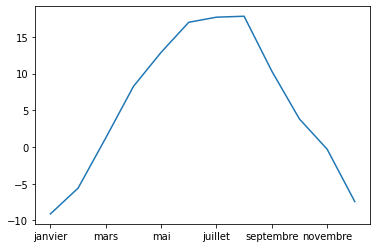

In [232]:
# Moyenne des températures par mois
print("Moyenne des températures par mois sur toute l'année 2018.")
wrongDataFrame.mean().plot(kind='line', use_index=True)
wrongDataFrame.mean()

Température maximum par mois sur toute l'année 2018.


janvier      -3.0
février       5.0
mars          7.0
avril        16.0
mai          18.0
juin         22.0
juillet      26.0
aout         26.0
septembre    16.0
octobre       7.0
novembre      5.0
décembre     -3.0
dtype: float64

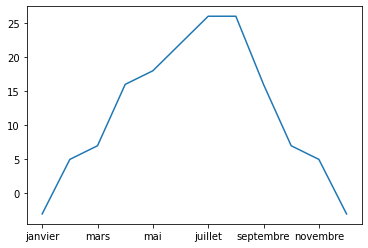

In [233]:
# Température maximum par mois sur toute l'année 2018.
print("Température maximum par mois sur toute l'année 2018.")
wrongDataFrame.max().plot(kind='line', use_index=True)
wrongDataFrame.max()

Température minimum par mois sur toute l'année 2018.


janvier     -23.0
février     -12.0
mars         -8.0
avril         2.0
mai           5.0
juin         11.0
juillet      -6.0
aout         14.0
septembre     6.0
octobre       1.0
novembre     -8.0
décembre    -11.0
dtype: float64

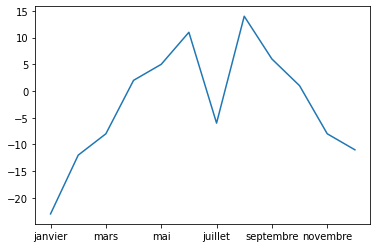

In [234]:
# Température minimum par mois sur toute l'année 2018.
print("Température minimum par mois sur toute l'année 2018.")
wrongDataFrame.min().plot(kind='line', use_index=True)
wrongDataFrame.min()

janvier      4.448759
février      4.715572
mars         3.542294
avril        3.415335
mai          4.036127
juin         2.988868
juillet      5.616460
aout         2.703542
septembre    2.429655
octobre      1.791407
novembre     3.511612
décembre     1.955246
dtype: float64

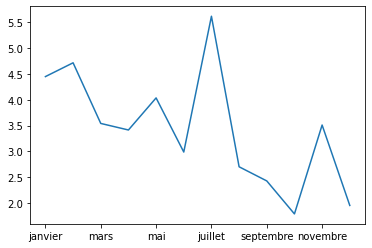

In [235]:
# écart type des températures par mois sur toute l'année 2018.
wrongDataFrame.std().plot(kind='line', use_index=True)
wrongDataFrame.std()

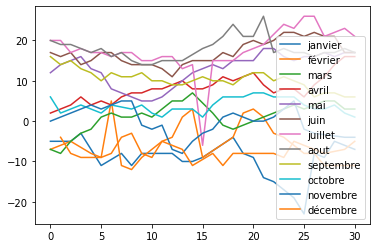

In [236]:
# toutes les courbes sur un même tableau
wrongDataFrame.plot(kind='line')

In [237]:
annualValuesWrong = []
wrongDataFrame = wrongDataFrame.astype(float)


for name, values in wrongDataFrame.iteritems():
    for dayValue in values:
      if(np.logical_not(np.isnan(dayValue))):
            annualValuesWrong.append(dayValue)

dwrong = {'degreesPerDay': annualValuesWrong}
dataframePerDayWrong = pd.DataFrame(data=dwrong)
dataframePerDayWrong

,degreesPerDay
0,-5.0
1,-5.0
2,-5.0
3,-3.0
4,-7.0
...,...
366,-7.0
367,-8.0
368,-7.5
369,-7.0


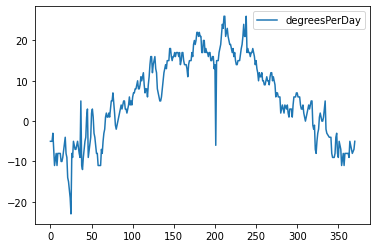

In [238]:
dataframePerDayWrong.plot(kind='line')

# Comparaison des données corrigées et des données sans erreur

On constate qu'une fois que les données du jeu éronné sont corrigées, les résultats obtenus sont très proches des résultats obtenus avec les données sans erreur.

# courbe de finlande

In [244]:
courbeDataFrame = pd.read_csv("/content/drive/MyDrive/mon drive/cours/qualite des donnees/app_python/data/courbeFinlande.csv")
courbeDataFrame

,jour,temp
0,1,-4.0
1,2,-4.6
2,3,-4.4
3,4,-6.5
4,5,-11.2
...,...,...
360,361,-12.1
361,362,-9.4
362,363,-3.1
363,364,-15.4


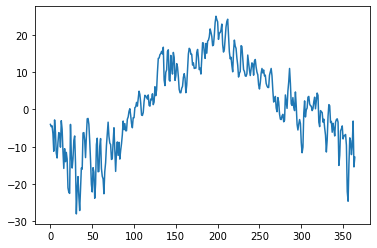

In [246]:
courbeDataFrame['temp'].plot(kind='line')

In [248]:
courbeDataFrame['temp'].mean()

1.3967123287671224

#Pays trouvé: Islande (Reykjavik)

Le pays recherché a donc des températures plus hautes que la finlande sur l'année.

Nous avons fait la température moyenne du pays a trouver et nous avons trouvé: 5.75°C

nous pensons donc que le pays recherché est l'islande avec ce lien comme source d'information sur les température de 2018:
https://www.infoclimat.fr/climatologie/annee/2018/reykjavik/valeurs/04030.html

